In [1]:
import cv2
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [2]:
import pandas as pd
import torch

Number of objects:  279


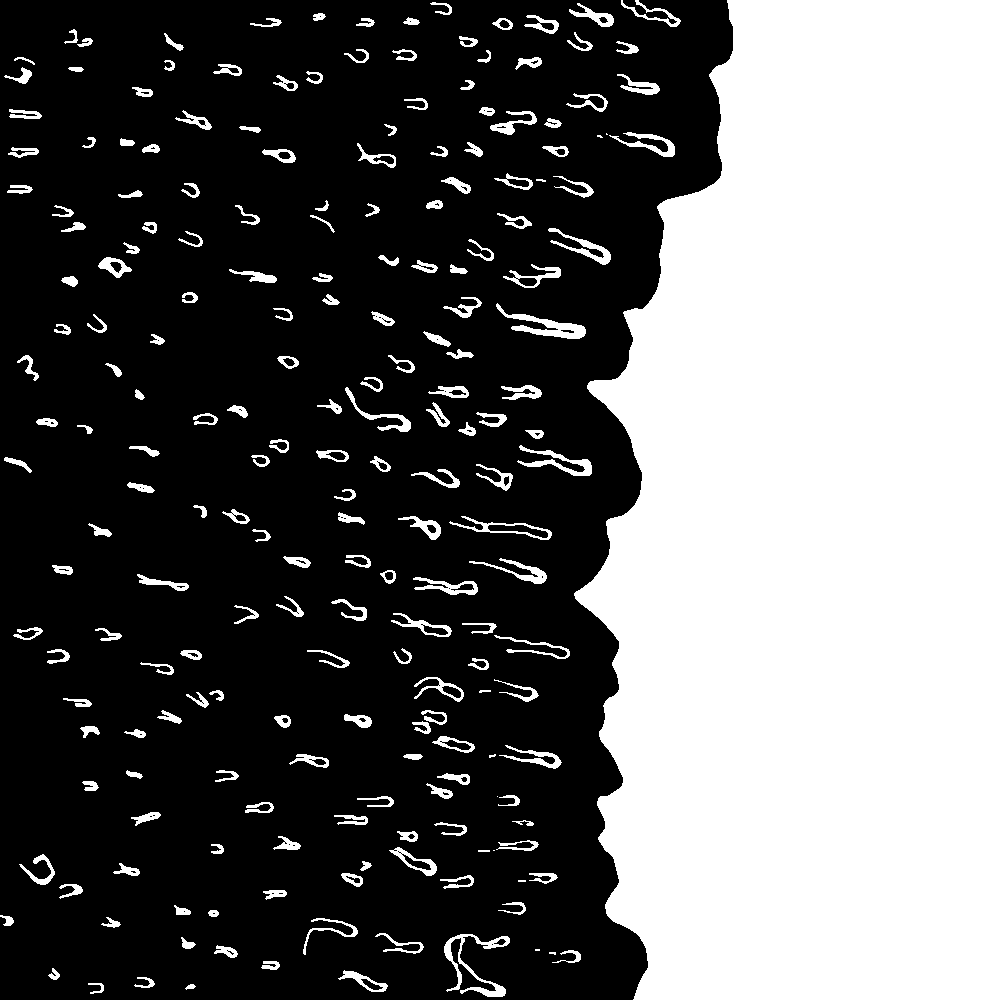

In [3]:
img = cv2.imread('/content/drive/MyDrive/ToyDataSet4Segmentation/train_masks/1.png', cv2.IMREAD_GRAYSCALE)
norm_image = cv2.normalize(img, None, 0.0, 255.0, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
norm_image[norm_image>0] = 255
#threshold_max = 255
#threshold = 0  # initial threshold
# 2. Найти контуры объектов на изображении
img_filtered = cv2.medianBlur(norm_image, 5)
ret, thresh = cv2.threshold(img_filtered, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#canny_output = cv2.Canny(norm_image, threshold, threshold_max)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = cv2.drawContours(norm_image, contours, -1, (0, 255, 0), 2)
#print(contours)
# 4. Вывести результат
# выводим количество найденных объектов
print('Number of objects: ', len(contours))
cv2_imshow(img_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()
#contour



In [ ]:
# Находим площадь контура
cnt = contours[1]
area = cv2.contourArea(cnt)
diameters = []
# Находим периметр контура
perimeter = cv2.arcLength(cnt, True)
print('Perimetr: ', perimeter)
# Находим координаты центра контура
M = cv2.moments(cnt)
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
print('center of the circle: ', cx, cy)
# Вычисляем круглость контура
circularity = (4 * np.pi * area) / (perimeter ** 2)
print('croundness: ', circularity)
#Вычисляем диаметр конутра
(x, y), radius = cv2.minEnclosingCircle(cnt)
diameter = radius * 2
diameters.append(diameter)
print('Диаметры контуров: ', diameters)
# Аппроксимируем контур полигоном
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
print('approximation: ', approx)

Perimetr:  104.9116872549057
center of the circle:  470 980
croundness:  0.24547121972301245
Диаметры контуров:  [41.61750411987305]
approximation:  [[[459 965]]

 [[461 988]]

 [[493 989]]]


In [4]:
areas = []
perimeters = []
cxs = []
cys = []
circularitys = []
diameters = []
approxs = []
areamin = 0
areamax = 1000
capillary_count = 0
for cnt in contours:
  area = cv2.contourArea(cnt)
  areas.append(area)
  if area > areamin and area < areamax:
        perimeter = cv2.arcLength(cnt, True)
        perimeters.append(perimeter)
        circularity = 4 * np.pi * area / (perimeter ** 2)
        circularitys.append(circularity)
        if circularity > 0.3:
            capillary_count += 1
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            diameter = radius * 2
            diameters.append(diameter)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cxs.append(cx)
            cys.append(cy)
            epsilon = 0.1 * cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, epsilon, True)
            approxs.append(approx)
# вывод результатов
print('Количество капилляров:', capillary_count)
print('Площадь капилляров:', areas)
print('Периметр: ', perimeters)
print('Круглость контура: ', circularitys)
print('Диаметры капилляров:', diameters)
print('Координаты центра контура: ', cxs, cys)
print('approximation: ', approxs)
#b = np.array(areas)
#print(b)
#a = np.array(perimeters)
#print(a)

Количество капилляров: 234
Площадь капилляров: [26.5, 215.0, 47.0, 8.5, 76.0, 26.5, 4.5, 12.0, 54.5, 32.0, 3.5, 26.0, 4.0, 16.0, 24.0, 53.0, 4.5, 1.0, 3.0, 39.0, 58.5, 17.5, 16.5, 0.0, 30.0, 54.0, 25.5, 19.5, 32.5, 152.5, 15.5, 10.0, 13.5, 7.5, 10.0, 63.0, 20.5, 41.0, 25.5, 1.0, 32.0, 35.5, 13.5, 6.0, 31.0, 33.0, 19.0, 7.5, 2.0, 13.5, 57.5, 29.0, 20.0, 23.5, 3.5, 16.0, 27.5, 46.5, 0.0, 30.5, 27.0, 4.0, 12.5, 95.0, 55.0, 4.0, 65.0, 9.0, 22.5, 8.0, 7.0, 25.0, 7.5, 25.5, 20.5, 4.0, 8.0, 58.5, 32.5, 38.5, 637103.5, 93.0, 195.0, 239.0, 637.5, 155.5, 230.5, 18.0, 311.5, 294.0, 182.0, 2243.5, 610.0, 747.0, 206.0, 120.0, 195.5, 309.5, 267.5, 322.0, 440.0, 350.0, 304.5, 300.5, 140.5, 598.5, 762.0, 179.0, 491.5, 344.5, 270.5, 355.0, 162.5, 398.5, 328.0, 373.5, 373.0, 271.5, 315.0, 215.5, 350.5, 281.5, 159.5, 172.0, 469.0, 865.5, 568.0, 202.0, 241.5, 247.0, 375.5, 643.5, 276.0, 265.5, 274.5, 173.0, 546.0, 797.0, 336.0, 278.5, 456.5, 257.0, 317.5, 252.0, 297.0, 381.0, 1186.0, 829.5, 321.5, 483.0, 

In [ ]:
#a = torch.from_numpy(b)

#print(a)

tensor([2.6500e+01, 2.1500e+02, 4.7000e+01, 8.5000e+00, 7.6000e+01, 2.6500e+01,
        4.5000e+00, 1.2000e+01, 5.4500e+01, 3.2000e+01, 3.5000e+00, 2.6000e+01,
        4.0000e+00, 1.6000e+01, 2.4000e+01, 5.3000e+01, 4.5000e+00, 1.0000e+00,
        3.0000e+00, 3.9000e+01, 5.8500e+01, 1.7500e+01, 1.6500e+01, 0.0000e+00,
        3.0000e+01, 5.4000e+01, 2.5500e+01, 1.9500e+01, 3.2500e+01, 1.5250e+02,
        1.5500e+01, 1.0000e+01, 1.3500e+01, 7.5000e+00, 1.0000e+01, 6.3000e+01,
        2.0500e+01, 4.1000e+01, 2.5500e+01, 1.0000e+00, 3.2000e+01, 3.5500e+01,
        1.3500e+01, 6.0000e+00, 3.1000e+01, 3.3000e+01, 1.9000e+01, 7.5000e+00,
        2.0000e+00, 1.3500e+01, 5.7500e+01, 2.9000e+01, 2.0000e+01, 2.3500e+01,
        3.5000e+00, 1.6000e+01, 2.7500e+01, 4.6500e+01, 0.0000e+00, 3.0500e+01,
        2.7000e+01, 4.0000e+00, 1.2500e+01, 9.5000e+01, 5.5000e+01, 4.0000e+00,
        6.5000e+01, 9.0000e+00, 2.2500e+01, 8.0000e+00, 7.0000e+00, 2.5000e+01,
        7.5000e+00, 2.5500e+01, 2.0500e+

In [ ]:
#nc = len(contours)
#n = [i for i in range(nc)] # auxiliary variable
d = [0]*(1)
df_temp = [0]*(1)
for i in [i for i in range(1)]:
  nr = [i for i in range(len(contours[i]))]
  d[i] = pd.DataFrame()
  for j in nr:
    df_temp[i] = pd.DataFrame({'No':j,
                          'Площадь капилляров (mum^2)':),
                          'Периметр (mum)': ,
                          'Круглость контура (mum)':,
                          'Диаметры капиляров (mum)':,
                          'Кординаты центра контура х':,
                          'Координаты центра контура y': })
    d[i] = pd.concat([d[i],df_temp[i]])
    d[i].to_csv(img_path + img_title[0:-4] +'_channel_'+str(i) + '.csv')

AttributeError: ignored

In [7]:
df = pd.DataFrame({  'Периметр' : perimeters, 'Круглость контура' : circularitys })
df1 = pd.DataFrame({  'Площадь капилляров' : areas })
df2 =  pd.DataFrame({  'Диаметр каппиляров' : diameters, 'Кординаты центр х' : cxs,'Кординаты центр y' : cys })
print(df2)
print(df)
print(df1)

     Диаметр каппиляров  Кординаты центр х  Кординаты центр y
0             15.132946                411                947
1              4.472336                500                941
2             21.095222                455                948
3             11.180540                463                881
4              3.162478                356                880
..                  ...                ...                ...
229           21.047808                410                 21
230           39.166775                542                 23
231           16.795963                318                 16
232           50.960968                592                 15
233           27.313200                441                  7

[234 rows x 3 columns]
       Периметр  Круглость контура
0     36.384776           0.251545
1    104.911687           0.245471
2     35.656854           0.464538
3     12.242641           0.712654
4     48.970562           0.398248
..          ...       

In [ ]:
# загрузка изображения ногтевого ложа
img = cv2.imread('/content/drive/MyDrive/ToyDataSet4Segmentation/saved_images/1.png')

In [ ]:

# преобразование изображения в градации серого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



# применение адаптивного порогового фильтра
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# поиск контуров на изображении
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# определение диаметра капилляров и их количества
diameters = []
capillary_count = 0

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 10 and area < 150:
        perimeter = cv2.arcLength(cnt, True)
        circularity = 4 * np.pi * area / (perimeter ** 2)
        if circularity > 0.75:
            capillary_count += 1
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            diameter = radius * 2
            diameters.append(diameter)

# вывод результатов
print('Диаметры капилляров:', diameters)
print('Количество капилляров:', capillary_count)

Диаметры капилляров: [5.09921932220459, 4.4723358154296875, 5.831151485443115, 6.3247551918029785, 6.082962512969971, 5.200188636779785, 5.831151485443115, 5.385364532470703, 5.09921932220459, 5.09921932220459, 6.082962512969971, 5.09921932220459, 5.09921932220459, 11.045560836791992, 4.4723358154296875, 4.333540916442871, 5.440041542053223, 6.144682884216309, 5.09921932220459, 5.385364532470703, 4.4723358154296875, 8.544203758239746, 5.09921932220459, 6.3247551918029785, 5.200150966644287, 5.200150966644287, 7.615972995758057, 4.4723358154296875, 4.4723358154296875, 8.310585021972656, 5.831151485443115, 5.09921932220459, 7.280309677124023, 5.09921932220459, 7.35417366027832, 5.200212001800537, 6.082962512969971, 5.09921932220459, 5.09921932220459, 6.082962512969971, 5.09921932220459, 6.082962512969971, 5.09921932220459, 5.09921932220459, 5.09921932220459, 6.166847229003906, 5.09921932220459, 5.200212001800537, 7.374381065368652, 5.09921932220459, 4.4723358154296875, 5.000199794769287,

In [ ]:
279'Площадь капилляров (mum^2)':int(contours[i][j].areas),
     171                     'Периметр (mum)': contours[i][j].perimeters,
    171                      'Круглость контура (mum)':contours[i][j].circularitys,
   169                       'Диаметры капиляров (mum)':contours[i][j].diametrs,
    169                      'Кординаты центра контура х':contours[i][j].cxs,
    169                      'Координаты центра контура y': contours[i][j].cys,})
    d[i] = pd.concat([d[i],df_temp[i]])
    d[i].to_csv(img_path + img_title[0:-4] +'_channel_'+str(i) + '.csv')

error: ignored